<h1 style="background-color:#1afCCC;font-family:ALGERIAN;font-size:250%;text-align:center;border-radius: 15px 15px;padding: 5px">LIBRARIES USED</h1>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from wordcloud import WordCloud
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install neattext
import neattext.functions as nfx
import matplotlib.pyplot as plt
import plotly.express as plx
from sklearn.metrics import classification_report
import keras
from keras.layers import Embedding,Dense,LSTM,Bidirectional,GlobalMaxPooling1D,Input,Dropout
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tqdm import tqdm
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00


In [5]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Suicide_Detection.csv')
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [6]:
data['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

In [7]:
data['class'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

<h1 style="background-color:#1afCCC;font-family:ALGERIAN;font-size:250%;text-align:center;border-radius: 15px 15px;padding: 5px">DATA-SET SPLIT</h1>


In [8]:
train_data,test_data=train_test_split(data,test_size=0.2,random_state=10)



```
# This is formatted as code
```



In [9]:
train_data['class'].value_counts().index.values

array(['suicide', 'non-suicide'], dtype=object)

In [10]:
plx.bar(train_data,x=train_data['class'].value_counts().index.values,
        y=train_data['class'].value_counts(),color=['Suicide','Not Suicide'])

<h1 style="background-color:#1afCCC;font-family:ALGERIAN;font-size:250%;text-align:center;border-radius: 15px 15px;padding: 5px">DATA CLEANING</h1>


In [11]:

def clean_text(text):
    text_length=[]
    cleaned_text=[]
    for sent in tqdm(text):
        sent=sent.lower()
        sent=nfx.remove_special_characters(sent)
        sent=nfx.remove_stopwords(sent)
        text_length.append(len(sent.split()))
        cleaned_text.append(sent)
    return cleaned_text,text_length

In [12]:
train_data

,Unnamed: 0,text,class
57153,85778,HEY EAST COST How ya guys doin \nWhats snow like?,non-suicide
143188,214891,I just ate an edible I just ate an edible and ...,non-suicide
109923,165234,Helplessness. All I have.Last week or two I’ve...,suicide
115420,173429,Who do you want to win the election? Now this ...,non-suicide
44691,66964,Toothpicks?So if there is one thing I can't do...,suicide
...,...,...,...
105595,158739,Anyone have some spare time?If anyone has abso...,suicide
93553,140539,Can anyone help me?I feel so broken inside. I ...,suicide
181568,272486,I legitimately don't know how to go about this...,non-suicide
94735,142276,I want someone to realize I'm suicidal and hel...,suicide


In [13]:
train_data.text

57153     HEY EAST COST How ya guys doin \nWhats snow like?
143188    I just ate an edible I just ate an edible and ...
109923    Helplessness. All I have.Last week or two I’ve...
115420    Who do you want to win the election? Now this ...
44691     Toothpicks?So if there is one thing I can't do...
                                ...                        
105595    Anyone have some spare time?If anyone has abso...
93553     Can anyone help me?I feel so broken inside. I ...
181568    I legitimately don't know how to go about this...
94735     I want someone to realize I'm suicidal and hel...
83209     I can'tI don't know where to begin. There's so...
Name: text, Length: 185659, dtype: object

In [14]:
cleaned_train_text,train_text_length=clean_text(train_data.text)
cleaned_test_text,test_text_length=clean_text(test_data.text)

100%|██████████| 46415/46415 [00:04<00:00, 10095.17it/s]


In [15]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(cleaned_train_text)

In [16]:
word_freq=pd.DataFrame(tokenizer.word_counts.items(),columns=['word','count']).sort_values(by='count',ascending=False)

<h1 style="background-color:#1afCCC;font-family:ALGERIAN;font-size:250%;text-align:center;border-radius: 15px 15px;padding: 5px">PREPROCESSING TEXT DATA</h1>


In [17]:
train_text_seq=tokenizer.texts_to_sequences(cleaned_train_text)
train_text_pad=pad_sequences(train_text_seq,maxlen=50)


test_text_seq=tokenizer.texts_to_sequences(cleaned_test_text)
test_text_pad=pad_sequences(test_text_seq,maxlen=50)

In [18]:
lbl_target=LabelEncoder()
train_output=lbl_target.fit_transform(train_data['class'])
test_output=lbl_target.transform(test_data['class'])

In [19]:
train_output

array([0, 0, 1, ..., 0, 1, 1])

<h1 style="background-color:#1afCCC;font-family:ALGERIAN;font-size:250%;text-align:center;border-radius: 15px 15px;padding: 5px">GLOVE EMBEDDINGS</h1>


In [20]:
# glove_embedding={}
with open('/content/drive/MyDrive/Colab Notebooks/glove.840B.300d.pkl', 'rb') as fp:
    glove_embedding = pickle.load(fp)

In [21]:
v=len(tokenizer.word_index)

embedding_matrix=np.zeros((v+1,300), dtype=float)
for word,idx in tokenizer.word_index.items():
    embedding_vector=glove_embedding.get(word)
    if embedding_vector is not None:
        embedding_matrix[idx]=embedding_vector

In [22]:
early_stop=EarlyStopping(patience=5)
reducelr=ReduceLROnPlateau(patience=3)

<h1 style="background-color:#1afCCC;font-family:ALGERIAN;font-size:250%;text-align:center;border-radius: 15px 15px;padding: 5px">MODEL BUILDING</h1>


In [23]:
model=Sequential()
model.add(Input(shape=(50,)))
model.add(Embedding(v+1,300,weights=[embedding_matrix],trainable=False))
model.add(LSTM(20,return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=keras.optimizers.SGD(0.1,momentum=0.09),loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           81560700  
                                                                 
 lstm (LSTM)                 (None, 50, 20)            25680     
                                                                 
 global_max_pooling1d (Globa  (None, 20)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 256)               5376      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 81,592,013
Trainable params: 31,313
Non-trainable params: 81,560,700
_______________________________________

In [25]:
r=model.fit(train_text_pad,train_output,validation_data=(test_text_pad,test_output),
            epochs=20,batch_size=256,callbacks=[early_stop,reducelr])

Epoch 1/20
726/726 [==============================] - 13s 9ms/step - loss: 0.3440 - accuracy: 0.8576 - val_loss: 0.2505 - val_accuracy: 0.8996 - lr: 0.1000
Epoch 2/20
726/726 [==============================] - 8s 11ms/step - loss: 0.2481 - accuracy: 0.9003 - val_loss: 0.2563 - val_accuracy: 0.8978 - lr: 0.1000
Epoch 3/20
726/726 [==============================] - 6s 9ms/step - loss: 0.2297 - accuracy: 0.9093 - val_loss: 0.2236 - val_accuracy: 0.9110 - lr: 0.1000
Epoch 4/20
726/726 [==============================] - 5s 7ms/step - loss: 0.2167 - accuracy: 0.9151 - val_loss: 0.2079 - val_accuracy: 0.9197 - lr: 0.1000
Epoch 5/20
726/726 [==============================] - 5s 7ms/step - loss: 0.2045 - accuracy: 0.9204 - val_loss: 0.2058 - val_accuracy: 0.9200 - lr: 0.1000
Epoch 6/20
726/726 [==============================] - 6s 8ms/step - loss: 0.1918 - accuracy: 0.9258 - val_loss: 0.2000 - val_accuracy: 0.9221 - lr: 0.1000
Epoch 7/20
726/726 [==============================] - 5s 7ms/step - 

In [26]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [37]:
test_output

array([0, 0, 0, ..., 1, 1, 0])

In [43]:
y_pred = model.predict(test_text_pad)


1451/1451 [==============================] - 5s 3ms/step


In [44]:
y_pred = (y_pred > 0.5)
y_pred = 1*y_pred

y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [46]:
tn, fp, fn, tp = confusion_matrix(test_output, y_pred).ravel()
false_positive_rate = fp / (fp + tn)

print("False Positive Rate:", false_positive_rate)

False Positive Rate: 0.05592658020595458


In [34]:
len(y_pred)

46415

In [33]:
len(test_output)

46415

<h1 style="background-color:#1afCCC;font-family:ALGERIAN;font-size:250%;text-align:center;border-radius: 15px 15px;padding: 5px">MODEL EVALUATION</h1>


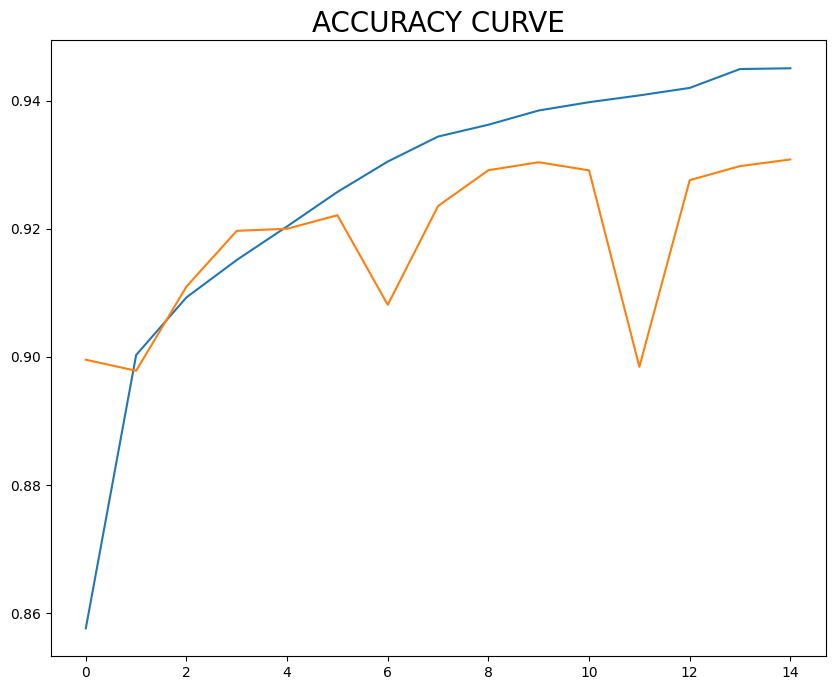

In [47]:
plt.figure(figsize=(10,8))
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

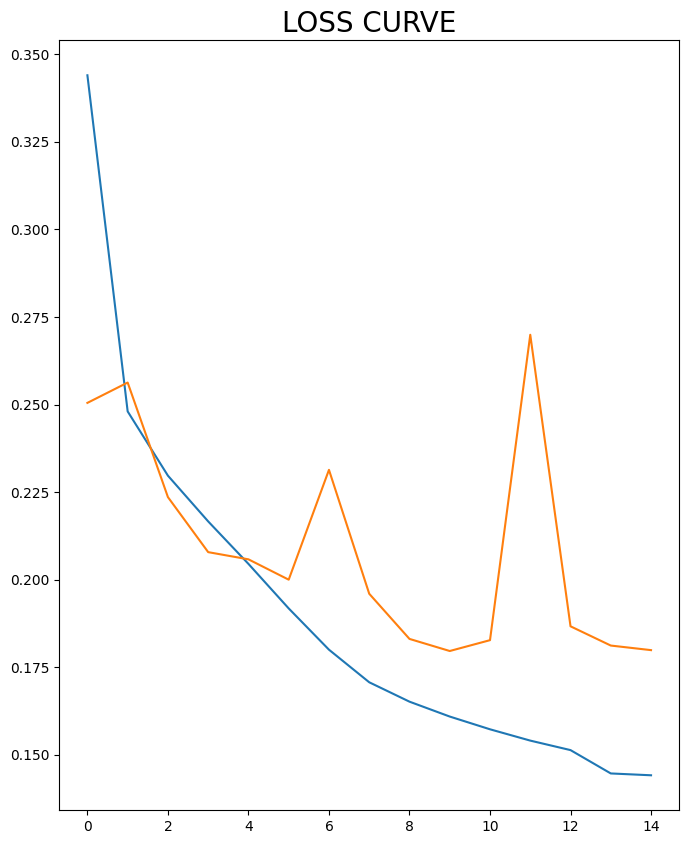

In [48]:
plt.figure(figsize=(8,10))
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('LOSS CURVE',fontdict={'size':20})
plt.show()

In [49]:
model.save('/content/drive/MyDrive/Colab Notebooks/model.h5')

In [50]:
tokenizer.save('/content/drive/MyDrive/Colab Notebooks/tokenize.h5')

AttributeError: ignored

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/model.pkl', 'wb') as f:
    # dump the object to the file using pickle.dump()
    pickle.dump(model, f)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/token.pkl', 'wb') as f:
    # dump the object to the file using pickle.dump()
    pickle.dump(tokenizer, f)

In [58]:
text = ["i am feeling lonely"]


In [59]:
cleaned_text,text_length=clean_text(text)
text_seq=tokenizer.texts_to_sequences(cleaned_text)
text_pad=pad_sequences(text_seq,maxlen=50)




100%|██████████| 1/1 [00:00<00:00, 7973.96it/s]


In [60]:
model.predict(text_pad)

1/1 [==============================] - 0s 28ms/step


array([[0.4611723]], dtype=float32)

In [ ]:
lbl_target.fit_transform(model.predict(text_pad))

1/1 [==============================] - 0s 21ms/step


array([0])

In [54]:
model.accuracy()\\

AttributeError: ignored